In [1]:
import numpy as np
import os
from scipy import signal as signal
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import glob
import seaborn as sns
from scipy import stats
import math
import gc
import itertools
from __future__ import print_function

In [2]:
#this defines the "model function" that will be later used to fit decreasing exponentials to the data
def model_func(t, A, K, C):
    return A * np.exp(-K * t) + C

In [3]:
#There is a folder for each amplicon containing the raw temperature and denaturation data
#Change fileDirectory to point to the amplicon you want to study 
    
fileDirectory ='C:/Users/Dan/Desktop/good_test_data/DENATURATION_51bp_A/'
os.chdir(fileDirectory)
fileNameSuffix= fileDirectory[-12:].partition('_')[2].partition('/')[0]
print(fileNameSuffix)

#The file ending in _normalized is the HR1 melting data, I am loading it to get the Tm for the amplicon
d = np.loadtxt(fileDirectory+fileNameSuffix+'_normalized', delimiter="\t", skiprows=1)
d = d[np.isfinite(d[:,1])]
d = d[np.isfinite(d[:,2])] 

#this is subtracting off the offset i found between my calibrated system (ice and boiling water) and the HR-1
d[:,1]=d[:,1]-2.2887214
d[:,2] = signal.savgol_filter(d[:,2], 33, 1, deriv=0)

#this gives the max of the inverse melting curve (Tm)
meltingTemperature= d[np.argmax(d[:,2]),1]
print(meltingTemperature)

#Finding what the "cold" temperature is from the filename
sfbDecompressed= glob.glob('*_sfb_decompressed*')
tempHolder= sfbDecompressed[0].partition('l2')[2].partition('c')[0].partition('_')[2].rpartition('_')[0].rpartition('_')
baseTemperature=tempHolder[0]+'.'+tempHolder[2]

#100bp_T_normalized
print(baseTemperature)
linearHolder=[]
exponentialHolder=[]

51bp_A
75.1560786
77.0


In [4]:
#this code finds the "melting region" of the curve and contains some redundant code previously described
# it also finds the area of the melting region and computes the Tm (half the area)
#lower limit found through sign changes of derivative plot, upper limit found by using a cutoff value

from scipy.integrate import simps
f = open(fileNameSuffix+'_MELTING.txt','w')

fig = plt.figure()

#if '100bp_T' in elements:

d = np.loadtxt(fileDirectory+fileNameSuffix+'_normalized', delimiter="\t", skiprows=1)

d = d[np.isfinite(d[:,1])]
d = d[np.isfinite(d[:,2])] 

d[:,1]=d[:,1]-2.2887214
d[:,2] = signal.savgol_filter(d[:,2], 33, 1, deriv=0)

smoothedPlot = signal.savgol_filter(d[:,2], 61, 1, deriv=1) # window size 51, polynomial order 3



Tm= d[np.argmax(d[:,2]),1]
print(Tm, meltingTemperature)
pp=int(d[np.where(d[:,1] == Tm)][0][0])

#Find max and min of derivative melt plot
upperBound=d[np.argmin(smoothedPlot),1]
lowerBound= d[np.argmax(smoothedPlot),1]


signChanges =d[np.where(np.diff(np.sign(smoothedPlot)))[0],1]

upperEdge= next(index for index, i in enumerate(d[pp:,2]) if i < 2.5)
upperTemp=upperEdge+pp

lowerEdge= np.where( signChanges < d[np.argmax(smoothedPlot),1])[-1][-1]

lowerTemp= np.where(d[:,1] == signChanges[lowerEdge])[-1][0]
low=d[lowerTemp,1]
high=d[upperTemp,1]

area = simps(d[lowerTemp:upperTemp:1,2],d[lowerTemp:upperTemp:1,1])

iA=simps(d[pp:upperTemp:1,2],d[pp:upperTemp:1,1])
iB=simps(d[lowerTemp:pp:1,2],d[lowerTemp:pp:1,1])

fiftyArea=0
areaMidPointTemp = lowerTemp+1

while fiftyArea < (area/2):
    fiftyArea = simps(d[lowerTemp:areaMidPointTemp:1,2],d[lowerTemp:areaMidPointTemp:1,1])
    areaMidPointTemp=areaMidPointTemp+1

areaMidPointTemp = d[areaMidPointTemp,1]
f.close()   


75.1560786 75.1560786


l1_82_6_l2_77_0_c_78_3_M_87_6_sfb_SHORT_RATE_1000000_SAMPLES_10000000_CalibrationConstant_2404_1249_ReferenceIntensity_1_0372_ReferenceTemp_75_5104_averageTemp_81_6107_sfb_decompressed.txt
9897000 9897650 650 1000
0.04159
AAAAAA 9897000 9897650
9897000 9897000
9897000 9897000
LENGTH9445000
9897000 9897000


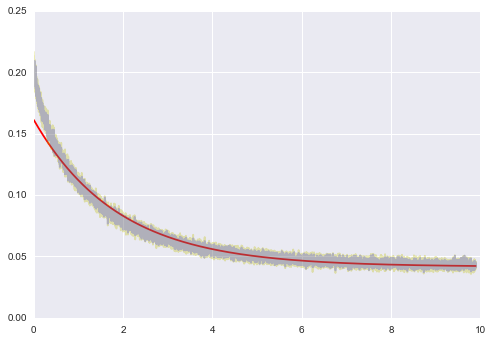

-0.530143192416 0.119567612701 0.04159


In [5]:
#use log-linear plots to find the rate constants 
#NATURAL LOG

allRateConstant=[]
allDeltaTemp=[]

fig = plt.figure()

fileNames= os.listdir(fileDirectory)
os.chdir(fileDirectory)
sfbDecompressed= glob.glob('*_sfb_decompressed*')
plt.locator_params(nbins=6)

#the data collection starts before the reaction, the offset gives the number of data points where the reaction begins (102350)
offset =102350
lenth = offset+10000000
#old offset =102550
Tm = 76.8

filterWindow=10001
filterWindow1000=1001
deltaTemp=[]
rateConstant=[]

slope=float('nan')
intercept=float('nan')
r_value=float('nan')
p_value=float('nan')
std_err=float('nan')

#Creating an array for time that takes into account the offset
timeArray = np.linspace(0,10, num=10000000)  
offsetTime= timeArray[offset]
timeArray=np.array(timeArray[offset:])
linearHolder=[]



#loop over all of the denaturation files
searchFile = 'SHORT_RATE_1000000SAMPLES10000000_decompressed'
for elements in fileNames:
     if 'lcg_'+searchFile in elements:
        #print elements
        for sfb in sfbDecompressed:
            
            #for each LCG file (denaturation data) there is a corresponding SFB file (temperature data)
            #pull out correspodning SFB and LCG files
            if elements[:24] in sfb:
                print(sfb)
                d = np.loadtxt(elements, delimiter="\t")
               
                                
                data=list(d[offset:])
                
                #AVERAGING SUB-SLICES. Instead of using Savitsky-Golay to filter the data, which would render the first window/2 
                #points invalid, i just divided the data into 2000 point sub-slices and averaged them 
                slicedArray=[(data[i:i+1000]) for i in range(0, len(data), 1000)]
                meanArray = np.linspace(0,0, num=len(data)-len(slicedArray[-1]))
                for index, ii in enumerate(slicedArray[:-1]):
                    meanArray[index*1000:index*1000+1000]=np.mean(ii)
                
                print(len(meanArray), len(data), len(slicedArray[-1]), len(slicedArray[-2]))
                arrayMean= meanArray[-1]
                print(arrayMean)
                
                #take the natural log of data and subtract off offset (last point of data)
                naturalLog = np.array(meanArray)-arrayMean
                naturalLog=np.array(naturalLog)
                naturalLog = np.log(naturalLog)

                #remove "not a number" data
                print('AAAAAA', len(naturalLog), len(timeArray))
                print(len(d[offset:len(d)-len(slicedArray[-1]):1]), len(meanArray))
                rawDataMasked=np.ma.masked_array(d[offset:len(d)-len(slicedArray[-1]):1],mask=np.isnan(naturalLog)).compressed()
                xm = np.ma.masked_array(timeArray[:len(meanArray)],mask=np.isnan(naturalLog)).compressed()
                ym = np.ma.masked_array(naturalLog,mask=np.isnan(naturalLog)).compressed()
                print(len(d[offset:len(d)-len(slicedArray[-1]):1]), len(meanArray))
                
                #remove "infinite" data
                finiteYmask = np.isfinite(ym)
                Yclean = ym[finiteYmask]
                Xclean = xm[finiteYmask]
                rawDataMasked=rawDataMasked[finiteYmask]
                fitHolder=[]
                print('LENGTH'+str(len(Yclean)))
                #tried 1000
                
                #find the slope of the natural log data, RESIDUAL and intercept
                #This find the slope of the data in increasing increments of 10000 points
                #need to find the slope in the linear area of the data 
                #puts fits in an array and find the minimum residual 
                for i in itertools.takewhile (lambda x: x<= len(Yclean), range(0,len(Yclean),10000)):
                   
                    try:
                        
                        
                        slope, intercept, r_value, p_value, std_err = stats.linregress((Xclean-offsetTime)[:i],
                                                                                       (Yclean+arrayMean)[:i])
                        fit_y= np.exp(intercept)*np.exp(slope*(Xclean-offsetTime)[:i])+arrayMean
                        residual=np.divide(np.sum(rawDataMasked[:i]-fit_y), len(rawDataMasked))
                        
                        fitHolder.append([residual, i, slope, intercept])
                        #plt.plot((Xclean-offsetTime)[:i], fit_y)
                       
                    except Exception:
                        continue
                            
              
                    
                #find minimum residual and generate fit from the corresponding log-linear slope
                tt = np.array(fitHolder)
                min_R= np.argmin(np.absolute(tt[:,0]))
                minLength= int(tt[min_R][1])
                
                fit_y= np.exp(tt[min_R][2]*(Xclean-offsetTime))*np.exp(tt[min_R][3])+arrayMean
                residual= tt[min_R][0]
                
               
                
                K=tt[min_R][2]
                A=np.exp(tt[min_R][3])
                linearOffset=arrayMean
                
                #plt.plot(Xclean-offsetTime, np.exp(tt[max_R][2]*(Xclean-offsetTime))*np.exp(tt[max_R][3])+arrayMean)
                linearFit=np.exp(tt[min_R][2]*(timeArray-offsetTime))*np.exp(tt[min_R][3])+arrayMean
                
                if(np.isfinite(residual) and (K<0)):
                    plt.plot(timeArray-offsetTime, linearFit, color='red')
                
                smoothedPlot = signal.savgol_filter(d[offset:len(meanArray)+offset:1], 1001, 1)
                print(len(timeArray[:len(meanArray)]-offsetTime), len(smoothedPlot))
                plt.plot(timeArray[:len(meanArray)]-offsetTime,smoothedPlot, alpha=.3, color='y')     
                plt.plot(timeArray[:len(meanArray)]-offsetTime,meanArray, color='b', alpha=.2)
                plt.show()
                print(K, A, linearOffset)
                
                #put all of the data in a giant array called linearHolder. This holds all of the data for each amplicon
                linearHolder.append([elements, meltingTemperature, baseTemperature, 
                                     linearFit, min_R, minLength, residual, (timeArray-offsetTime), 
                                     smoothedPlot, K, A, linearOffset, Tm, areaMidPointTemp, low, high])
           

l1_82_6_l2_77_0_c_78_3_M_87_6_lcg_SHORT_RATE_1000000SAMPLES10000000_decompressed.txt
10000000
AAAAAAAAAAAAAAAAAAAAAAAAAAAA
9
-3.28692536491e-11 9000000
0.149141814336 0.717657020568 0.0452086714479


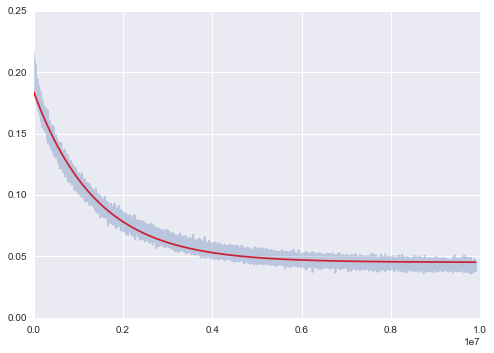

In [6]:
#This utilizes sciPy modules to do the curve fitting
#works in the same way as the previous log-linear code. Loops over all data and minimizes residuals
fig = plt.figure()
allRateConstant=[]
allDeltaTemp=[]

fileNames= os.listdir(fileDirectory)
os.chdir(fileDirectory)
sfbDecompressed= glob.glob('*_sfb_decompressed*')
#print sfbDecompressed
plt.hold(True)
offset =102350

timeArray = np.linspace(0,10, num=10000000)   
offsetTime= timeArray[offset]
timeArray=timeArray[offset:]

exponentialHolder=[]

searchFile = 'SHORT_RATE_1000000SAMPLES10000000_decompressed'
for elements in fileNames:
     if 'lcg_'+searchFile in elements:
        
        for sfb in sfbDecompressed:
            #print(elements)
            if elements[:24] in sfb:
                print(elements)

                d = np.loadtxt(elements, delimiter="\t")
                print(len(d))
                fitHolder=[]
                
                #Generates fits every 1,000,000 points. This is extreemly memory intensive and was getting memory issues
                #if sub-arrays <1,000,000 were used
                for i in itertools.takewhile (lambda x: x<= len(d[offset:]), range(0,len(d[offset:]),1000000)):
                    try:
                        opt_parms, parm_cov = sp.optimize.curve_fit(model_func, timeArray[:i], d[offset:i+offset:1],  maxfev = 8000)
                        
                        A, K, C = opt_parms
                        fit_y = np.array(model_func(timeArray[:i], A, K, C))


                        residual=np.divide(np.sum(d[offset:i+offset:1]-fit_y), len(d[offset:i+offset:1]))
                        fitHolder.append([residual, i])
                        #print(residual, i)
                        #plt.plot(fit_y)
                    except Exception:
                        print('AAAAAAAAAAAAAAAAAAAAAAAAAAAA')
                        continue
                            
              
                    
                    
                tt = np.array(fitHolder)
                print(len(tt))
                minVariance= np.argmin(np.absolute(tt[:,0]))
                minResidual=tt[minVariance][0]
                minLength= int(tt[minVariance][1])
                print(minResidual, minLength)
                opt_parms, parm_cov = sp.optimize.curve_fit(model_func, timeArray[:minLength], d[offset:minLength+offset],  maxfev = 8000)
                #opt_parms, parm_cov = sp.optimize.curve_fit(model_func, timeArray, d,  maxfev = 8000)
                A, K, C = opt_parms

                    
                fit_y = model_func(timeArray, A, K, C)
                
                
                print(A, K, C)
                plt.plot(fit_y, color='r')
                smoothedPlot1 = signal.savgol_filter(d[offset:], 1001, 1)
                plt.plot(smoothedPlot1, alpha=.3)
                exponentialHolder.append([elements, meltingTemperature, baseTemperature, 
                                     fit_y, minResidual, minLength, (timeArray-offsetTime),
                                     smoothedPlot1, K, A, C, Tm])

plt.show()

['l1_82_6_l2_77_0_c_78_3_M_87_6_sfb_SHORT_RATE_1000000_SAMPLES_10000000_CalibrationConstant_2404_1249_ReferenceIntensity_1_0372_ReferenceTemp_75_5104_averageTemp_81_6107_sfb_decompressed.txt']
1
l1_82_6_l2_77_0_c_78_3_M


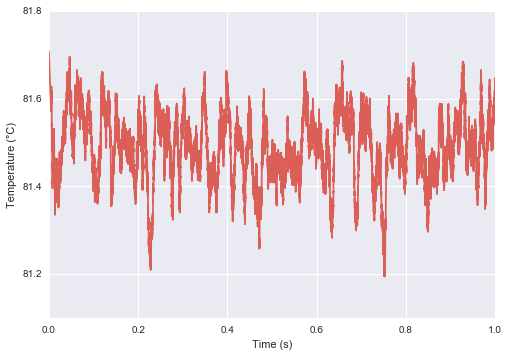

In [7]:
#Plot sulforhodamine B temperature curves

fig = plt.figure()
allRateConstant=[]
allDeltaTemp=[]

fileNames= os.listdir(fileDirectory)
os.chdir(fileDirectory)
sfbDecompressed= glob.glob('*_sfb_decompressed*')
plt.locator_params(nbins=6)

# for elements in fileNames:
#      if 'lcg_'+searchFile in elements:
#         #print elements
#         for sfb in sfbDecompressed:

offset =102350
x=float('nan')
 
sns.set_palette("hls", len(linearHolder))
filterWindow = 1001
palette = itertools.cycle(sns.color_palette())
print(sfbDecompressed)
print(len(linearHolder))
for sfb in sfbDecompressed:
    for index, elements in enumerate(linearHolder):
        #print(elements[0])
       
        if (elements[0][:24] in sfb):
            print(elements[0][:24])
            #src_path = os.path.join(fileDirectory, sfb)
            d = np.loadtxt(sfb, delimiter="\t")
            
            timeArray = np.linspace(0,10, num=10000000)   
            offsetTime= timeArray[offset]
            timeArray=timeArray[offset:]

            data=list(d)
            slicedArray=[(data[i:i+50000]) for i in range(0, len(data), 50000)]
            #average every 5000 points
            meanArray = np.linspace(0,0, num=1000000)
            for index, ii in enumerate(slicedArray):
                meanArray[index*50000:index*50000+50000]=np.mean(ii)
            
            #use Savitsky-Golay to smooth temperature
            smoothedPlot = signal.savgol_filter(d[offset:], 10001, 1)
            #plt.plot(timeArray-offsetTime, meanArray, '.')
            ww= next(palette)
            plt.plot(timeArray[:1000000]-offsetTime,smoothedPlot[:1000000], color=ww, label=elements[0][:29])
            #plt.plot(timeArray-offsetTime,meanArray[offset:], color=ww)

            
            #put 5000 averaged points array and Savitsky-Golay smoothed arrays in a holding array
            elements.insert(16, meanArray[offset:])
            elements.insert(17, smoothedPlot) #sfb
            elements.insert(18, d[offset:]) #sfb
         
            degree1= u'\N{DEGREE SIGN}'
            plt.ylabel('Temperature '+ '(' +degree1+'C)')
            plt.xlabel('Time (s)') 
          
        

# fig.savefig(fileNameSuffix+'_SFB.png', dpi=1000)
# plt.legend()
# fig.savefig(fileNameSuffix+'_SFB_legend.png', dpi=1000)
for expIndex, expElements in enumerate(exponentialHolder):
    for linIndex, linElements in enumerate(linearHolder):
        if(expElements[0][:24] in linElements[0]):
            expElements.insert(12, linElements[-3])
            expElements.insert(13, linElements[-2]) #sfb
            expElements.insert(14, linElements[-1]) #sfb


            
            


In [8]:
#save fits in pickle variables

import pickle

# obj0, obj1, obj2 are created here...


with open(fileDirectory+fileNameSuffix+'.pickle', 'w') as f:  # Python 3: open(..., 'wb')
    pickle.dump([exponentialHolder, linearHolder], f)

# Getting back the objects:
# with open(fileDirectory+'.pickle') as f:  # Python 3: open(..., 'rb')
#     exponentialHolder, linearHolder= pickle.load(f)